<a href="https://colab.research.google.com/github/Shaikmd3797/Linear-Regression-problems/blob/main/Salary_Discrimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***introduction***


 # ***Salary Discrimination***

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### ***Tasks***

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary

# ***import modules and read the datafile***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_fwf('salary.txt', header=None, 
                 names=['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [3]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

# ***1st jar of machine learning is data***

1. *cleaning*
2. *encoding*
3. *splitting*
4. *scaling*

# ***1) cleaning the data***

In [4]:
df.isnull().sum() # finding the missing the values

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df=df.drop_duplicates() #drop the duplicate data then stored the data into df
df.shape

(52, 6)

In [6]:
df.dtypes #checking the correct format in each column 
# checking the structured data. htis data contain columns and rows properly

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [7]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [8]:
q1=df['Year'].quantile(0.25)  # 25 th quantile
q3=df['Year'].quantile(0.75)  # 75 th quantile
iqr= q3-q1  #iqr value
upper= q3+1.5 * iqr
lower = q1 -1.5* iqr
print("the range value is :" ,lower, upper) # the values are outliers which is out of range
outliers=[x for x in df['Year'] if x< lower or x>upper] 
outliers

the range value is : -9.0 23.0


[25]

In [9]:
# no need to remove ther outliers in all 5 column

In [10]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [11]:
df=df.dropna()
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


# **cleaning the completed next step is EDA**

#***2) EDA***

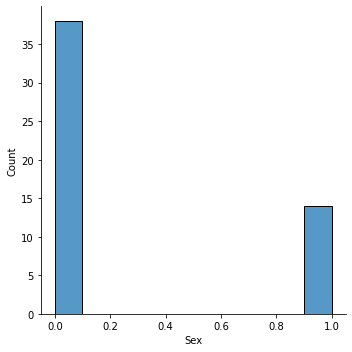

In [12]:
sns.displot(df,x= 'Sex',binwidth=0.1)

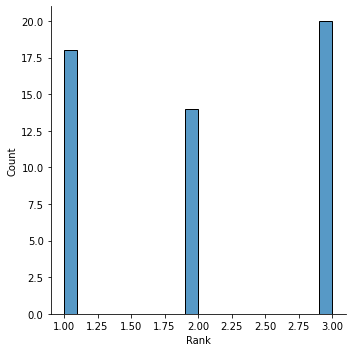

In [13]:
sns.displot(df,x= 'Rank',binwidth =0.1)

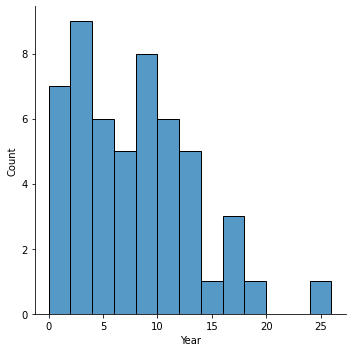

In [14]:
sns.displot(df,x='Year',binwidth=2)

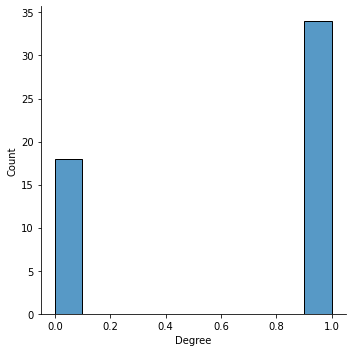

In [15]:
sns.displot(df,x='Degree',binwidth=0.1)

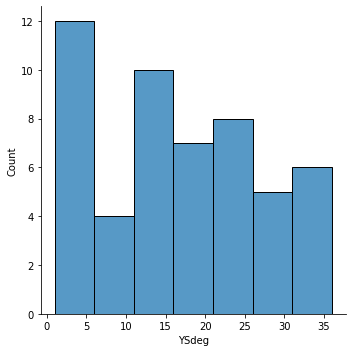

In [16]:
sns.displot(df,x='YSdeg',binwidth=5)

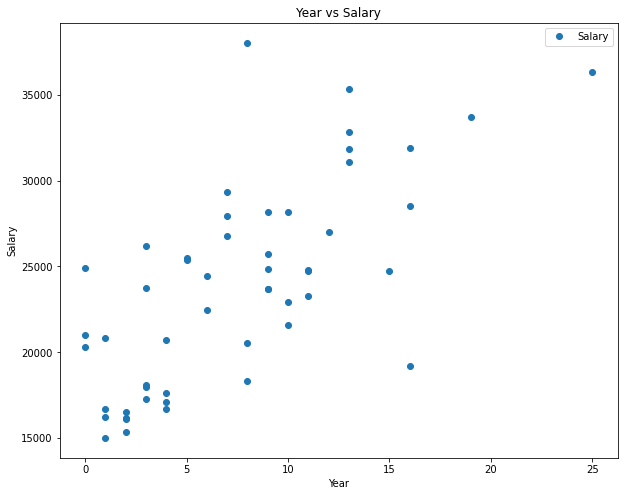

In [17]:
#df.groupby('Year')['Salary'].mean().plot(style='o', figsize=(10,8))
df.plot(x='Year',y='Salary',style='o', figsize=(10,8))
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [18]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


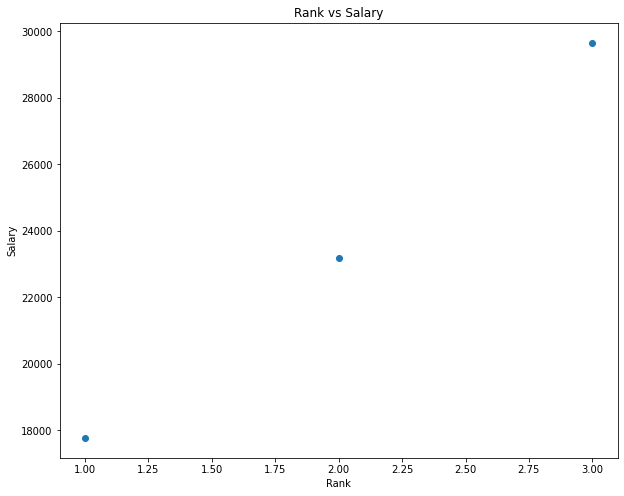

In [19]:
df.groupby('Rank')['Salary'].mean().plot(style='o', figsize=(10,8))
#df.plot(x='Rank',y='Salary',style='o', figsize=(10,8))
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [20]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


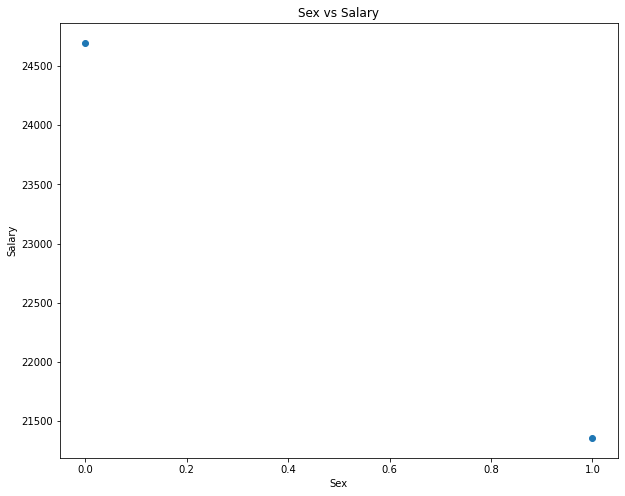

In [21]:
df.groupby('Sex')['Salary'].mean().plot(style='o', figsize=(10,8))
#df.plot(x='Sex',y='Salary',style='o', figsize=(10,8))
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [22]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [23]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


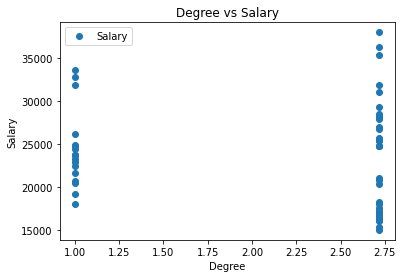

In [24]:
df['transformed'] = np.exp(df['Degree']) # transformation
df.plot(x='transformed', y='Salary', style='o')
#df.groupby('Degree')['Salary'].mean().plot(style='o', figsize=(10,8))
#df.plot(x='Degree',y='Salary',style='o', figsize=(10,8))
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [25]:
df[['transformed','Salary']].corr()

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


# ***All transformed column is not give linear relation to target variable.so we drop that column***

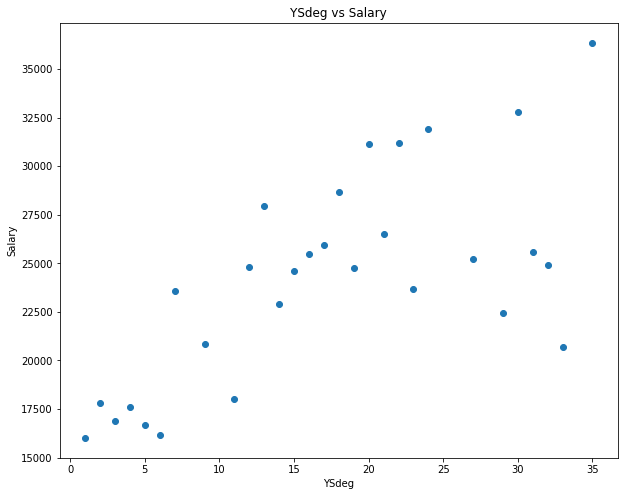

In [26]:
df.groupby('YSdeg')['Salary'].mean().plot(style='o', figsize=(10,8))
#df.plot(x='YSdeg',y='Salary',style='o', figsize=(10,8))
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [27]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


# ***the correlation between feature and target variable is more than 0.2 or less than -0.2 is considered as a linear pattern***

#***3)encoding***

#***encoding is not needed for this data because this data contains only continous values.***

# ***4) splitting the data for train and test***

In [28]:
X=df[['Sex','Rank','Year','YSdeg']]
y=df['Salary']

In [29]:
from sklearn.model_selection import train_test_split # import necessasary package

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=107)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    Sex  Rank  Year  YSdeg
2     0     3    10     23
20    0     1    16     23
35    0     2     1      9
29    0     2     3     17
24    0     2     9     12
51    1     1     0      2
17    0     2    11     14
42    0     2     0      7
47    1     1     2      2
30    1     1    10     15
49    1     1     1      1
19    0     3     6     21
23    1     3     8     24
9     0     3    13     31
22    0     3     7     13
26    0     2    11     14
43    1     1     3      3
27    1     3     5     16
3     1     3     7     27
4     0     3    19     30
8     0     3    13     30
32    0     1     9     14
28    0     2     3      7
21    0     2     8     31
46    1     1     2      6
18    0     2    10     15
16    0     3    13     20
15    0     3     7     15
38    0     1     4      5
41    0     1     3     11
34    1     2     6     29
11    0     2    15     19
14    0     3     9     24
6     1     3     0     32
25    0     3     5     18
48    0     1     1      1
 

# ***5)scaling the data***

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
#X_train=X_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)

In [33]:
scaler.fit(X_train) # scaling is not mandatory for linear regression
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

# ***2nd jar is task***

**this is supervised learning problem because we predict the target variable**

**feature is continous data so it is regression problem**

# ***3rd jar - model (linear regression***

# 1.  **linear model is y=mx+c**

# ***4th jar - loss function***
# ***5th jar - learning***


---





In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg=LinearRegression()
reg.fit(X_train_scale,y_train)

LinearRegression()

In [36]:
coeff_df=reg.coef_  # best value of m
coeff_df

array([ 551.65775868, 4223.46939087, 2190.56278312, -605.11692761])

In [37]:
reg.intercept_ # best value of c

23993.277777777777

In [38]:
y_predict=reg.predict(X_test_scale)
y_predict

array([35183.70091375, 16736.85031597, 16865.69289546, 32240.23399078,
       17569.90210371, 30187.60267679, 17121.16556496, 32046.97012153,
       29163.4995093 , 24065.37879099, 30636.33921554, 17614.54007919,
       19918.21908367, 17569.90210371, 21992.96416274, 23425.5908725 ])

# ***6th jar - evalute the model

In [39]:
from sklearn import metrics
print("R2 score is :",metrics.r2_score(y_test,y_predict))

R2 score is : 0.9193010076457075


In [40]:
reg.score(X_test_scale,y_test)

0.9193010076457075

# ***Now we take each 2 column get best R2 value

In [41]:
X=df[['Sex']]
y=df['Salary']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=107)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    Sex
2     0
20    0
35    0
29    0
24    0
51    1
17    0
42    0
47    1
30    1
49    1
19    0
23    1
9     0
22    0
26    0
43    1
27    1
3     1
4     0
8     0
32    0
28    0
21    0
46    1
18    0
16    0
15    0
38    0
41    0
34    1
11    0
14    0
6     1
25    0
48    0
    Sex
0     0
44    0
45    0
7     0
37    0
10    0
40    0
5     0
12    0
31    0
1     0
50    1
36    1
39    0
33    1
13    0
2     28200
20    19175
35    20850
29    23725
24    24832
51    20300
17    24742
42    20999
47    15350
30    21600
49    16686
19    24450
23    38045
9     32850
22    27959
26    24800
43    17250
27    25500
3     26775
4     33696
8     31850
32    23713
28    26182
21    20525
46    16150
18    22906
16    31114
15    29342
38    16700
41    18000
34    22450
11    24750
14    25748
6     24900
25    25400
48    16244
Name: Salary, dtype: int64
0     36350
44    16500
45    16094
7     31909
37    17095
10    27025
40    18075
5     28516
12    28200
3

In [43]:
#X_train=X_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)

In [44]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [45]:
coeff_df=reg.coef_ 
c=reg.intercept_ 
y_predict=reg.predict(X_test)

In [46]:
print("R2 score is :",metrics.r2_score(y_test,y_predict))

R2 score is : 0.06770317616444377


In [49]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary,transformed
0,0,3,25,1,35,36350,2.718282
1,0,3,13,1,22,35350,2.718282
2,0,3,10,1,23,28200,2.718282
3,1,3,7,1,27,26775,2.718282
4,0,3,19,0,30,33696,1.000000


**sex is not important role in this model very weak r2 score between sex and 
salary.**

In [50]:
X=df[['Sex','Rank','Year','Degree','YSdeg']]
y=df['Salary']

In [51]:
import itertools

In [52]:
combinations=[]
R2_score=[]
for i in range(len(X)+1):
  for j in itertools.combinations(X,i):
    combinations.append(j)

In [54]:
for i in range(1,len(combinations)):
  X_comp=df.loc[:,combinations[i]]
  y_comp=df.loc[:,'Salary']
  X_train,X_test,y_train,y_test=train_test_split(X_comp,y_comp,test_size=0.3,random_state=107)
  scaler.fit(X_train)
  X_train_scale=scaler.transform(X_train)
  X_test_scale=scaler.transform(X_test)
  reg=LinearRegression()
  reg.fit(X_train_scale,y_train)
  y_predict=reg.predict(X_test_scale)
  R2_score.append(metrics.r2_score(y_test,y_predict))
  print("R2 score", i-1 ,combinations[i],"is :",metrics.r2_score(y_test,y_predict))

R2 score 0 ('Sex',) is : 0.06770317616444366
R2 score 1 ('Rank',) is : 0.8174370083892257
R2 score 2 ('Year',) is : 0.6589047724124888
R2 score 3 ('Degree',) is : -0.015451487305329525
R2 score 4 ('YSdeg',) is : 0.47485616904599004
R2 score 5 ('Sex', 'Rank') is : 0.8215631729664521
R2 score 6 ('Sex', 'Year') is : 0.6599975477519151
R2 score 7 ('Sex', 'Degree') is : 0.06518484140557679
R2 score 8 ('Sex', 'YSdeg') is : 0.5236834913901268
R2 score 9 ('Rank', 'Year') is : 0.9199773329828498
R2 score 10 ('Rank', 'Degree') is : 0.7952331289793286
R2 score 11 ('Rank', 'YSdeg') is : 0.8219242768745539
R2 score 12 ('Year', 'Degree') is : 0.6564932790657472
R2 score 13 ('Year', 'YSdeg') is : 0.6519799289683823
R2 score 14 ('Degree', 'YSdeg') is : 0.5813338641453291
R2 score 15 ('Sex', 'Rank', 'Year') is : 0.9161261369098297
R2 score 16 ('Sex', 'Rank', 'Degree') is : 0.7978454640463845
R2 score 17 ('Sex', 'Rank', 'YSdeg') is : 0.8279275521818492
R2 score 18 ('Sex', 'Year', 'Degree') is : 0.657460

In [55]:
for i in range(0,len(R2_score)):
  if R2_score[i]==max(R2_score):
    print("intex of max(R2_score) is ",i)
    print("combinations of best features is", combinations[i+1])
    break

intex of max(R2_score) is  22
combinations of best features is ('Rank', 'Year', 'YSdeg')
